In [1]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
sns.set(style='darkgrid')

In [2]:
def ridge_regression(X, y, alpha=0.01, lambda_value=1, epochs=30):
    m = np.shape(X)[0]  # total number of samples
    n = np.shape(X)[1]  # total number of features
 
    X = np.concatenate((np.ones((m, 1)), X), axis=1)
    W = np.random.randn(n + 1, )
 
    # stores the updates on the cost function (loss function)
    cost_history_list = []
 
    # iterate until the maximum number of epochs
    for current_iteration in np.arange(epochs):  # begin the process
 
        # compute the dot product between our feature 'X' and weight 'W'
        y_estimated = X.dot(W)
 
        # calculate the difference between the actual and predicted value
        error = y_estimated - y
 
        # regularization term
        ridge_reg_term = (lambda_value / 2 * m) * np.sum(np.square(W))
 
        # calculate the cost (MSE) + regularization term
        cost = (1 / 2 * m) * np.sum(error ** 2) + ridge_reg_term
 
        # Update our gradient by the dot product between
        # the transpose of 'X' and our error + lambda value * W
        # divided by the total number of samples
        gradient = (1 / m) * (X.T.dot(error) + (lambda_value * W))
 
        # Now we have to update our weights
        W = W - alpha * gradient
 
        # Let's print out the cost to see how these values
        # changes after every iteration
        print(f"cost:{cost} \t iteration: {current_iteration}")
 
        # keep track the cost as it changes in each iteration
        cost_history_list.append(cost)
 
    return W, cost_history_list

cost:101305.6120833479 	 iteration: 0
cost:9695.243719118795 	 iteration: 1
cost:1850.2622186897868 	 iteration: 2
cost:1178.0109630236523 	 iteration: 3
cost:1119.9547300452382 	 iteration: 4


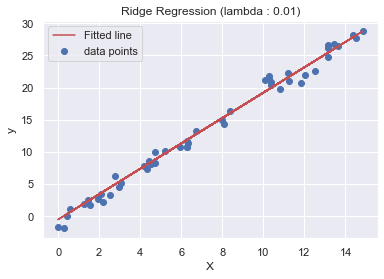

cost:414087.3722975141 	 iteration: 0
cost:299209.92685954395 	 iteration: 1
cost:244711.46547934556 	 iteration: 2
cost:217441.65763454037 	 iteration: 3
cost:203796.44424646063 	 iteration: 4


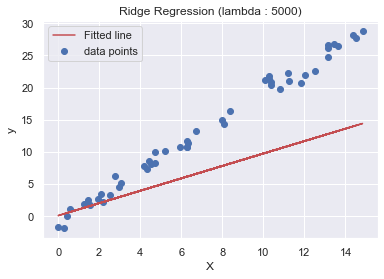

In [3]:
def main():
    rng = np.random.RandomState(1)
    x = 15 * rng.rand(50)
    X = x.reshape(-1, 1)
 
    y = 2 * x - 1 + rng.randn(50)
 
    lambda_list = [0.01, 5000]
 
    for lambda_ in lambda_list:
        # calls ridge regression function with different values of lambda
        weight, _ = ridge_regression(X, y, alpha=0.01,
                                     lambda_value=lambda_, epochs=5)
 
        fitted_line = np.dot(X, weight[1]) + weight[0]
        plt.scatter(X, y, label='data points')
        plt.plot(X, fitted_line, color='r', label='Fitted line')
        plt.xlabel("X")
        plt.ylabel("y")
        plt.title(f"Ridge Regression (lambda : {lambda_})")
        plt.legend()
        plt.show()
 
 
if __name__ == '__main__':
    main()